In [14]:
import pandas as pd
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import layers
from numpy import savetxt

In [2]:
data=pd.read_csv("C:\\Users\\arjun\\Desktop\\novacoin.csv")

In [3]:
df=data
df = df[['close']]

In [5]:
data = []
for i in df['close']:
  if(i<=10):
    data.append(i)
hist = []
target = []
length = 20
for i in range(len(data)-length):
    x = data[i:i+length]
    y = data[i+length]
    hist.append(x)
    target.append(y)


In [6]:
hist = np.array(hist)
target = np.array(target)
target = target.reshape(-1,1)

In [7]:
hist_scaled = hist.reshape((len(hist), length, 1))
print(hist_scaled.shape)


(1942, 20, 1)


In [8]:
X_train = hist_scaled[:1900,:,:]
X_test = hist_scaled[1900:,:,:]
y_train = target[:1900,:]
y_test = target[1900:,:]

In [9]:
newmodel = tf.keras.Sequential()
newmodel.add(layers.LSTM(units=64, return_sequences= True, input_shape=(X_train.shape[1],1)))
newmodel.add(layers.LSTM(units=64, return_sequences=True))
newmodel.add(layers.LSTM(units=64, return_sequences=True))
newmodel.add(layers.Dropout(0.2))
newmodel.add(layers.LSTM(units=64))
newmodel.add(layers.Dropout(0.2))

newmodel.add(layers.Dense(units=1))
newmodel.summary()
newmodel.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 64)            16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 64)            33024     
_________________________________________________________________
lstm_2 (LSTM)                (None, 20, 64)            33024     
_________________________________________________________________
dropout (Dropout)            (None, 20, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 6

In [10]:
history = newmodel.fit(X_train, y_train, epochs=30, batch_size=16)

Train on 1900 samples
Epoch 1/30
1900/1900 [==============================] - 21s 11ms/sample - loss: 1.4605
Epoch 2/30
1900/1900 [==============================] - 9s 5ms/sample - loss: 0.5182
Epoch 3/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 0.3401
Epoch 4/30
1900/1900 [==============================] - 9s 5ms/sample - loss: 0.2761
Epoch 5/30
1900/1900 [==============================] - 6s 3ms/sample - loss: 0.2142
Epoch 6/30
1900/1900 [==============================] - 4s 2ms/sample - loss: 0.1864
Epoch 7/30
1900/1900 [==============================] - 4s 2ms/sample - loss: 0.1810
Epoch 8/30
1900/1900 [==============================] - 4s 2ms/sample - loss: 0.1824
Epoch 9/30
1900/1900 [==============================] - 4s 2ms/sample - loss: 0.1706
Epoch 10/30
1900/1900 [==============================] - 4s 2ms/sample - loss: 0.1715
Epoch 11/30
1900/1900 [==============================] - 4s 2ms/sample - loss: 0.1593
Epoch 12/30
1900/1900 [================

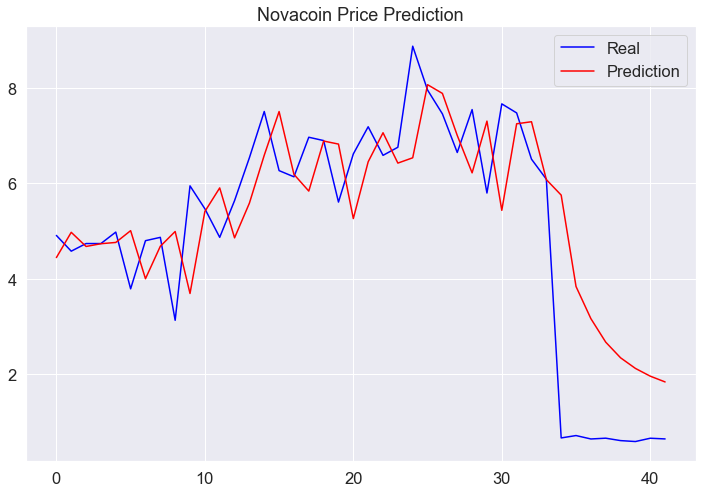

In [11]:
pred = newmodel.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Novacoin Price Prediction')
plt.legend()
plt.show()

In [12]:
newmodel.save("novacoin_model.h5")

In [15]:
y_test.shape
savetxt("testing_values_novacoin.txt",y_test)

In [18]:
loadarray=X_test.reshape(X_test.shape[0],-1)
savetxt("need_data_novacoin.txt",loadarray)

In [19]:
loadarray.shape

(42, 20)